<a href="https://colab.research.google.com/github/Soni-20/BACTERIAL-IMAGE-CLASSIFICATION/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, filters, transform
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set the path to the directory containing the images
path = '/content/drive/MyDrive/ANN'

In [ ]:
# get a list of all image filenames in the directory
filenames = os.listdir('/content/drive/MyDrive/ANN')

In [ ]:
labels=['Acinetobacter.baumanii_0002(1)','Acinetobacter.baumanii_0003(1)','Bifidobacterium.spp_0013','Candida.albicans_0011','Lactobacillus.delbrueckii_0003','Lactobacillus.jehnsenii_0001','Lactobacillus.paracasei_0001','Lactobacillus.plantarum_0001','Porfyromonas.gingivalis_0006','Pseudomonas.aeruginosa_0007','Staphylococcus.aureus_0001','Staphylococcus.epidermidis_0004','Staphylococcus.saprophiticus_0001']

In [ ]:
# create an empty list to store the preprocessed images
preprocessed_images = []

In [ ]:
# initialize empty lists to store preprocessed images and their labels
preprocessed_images = []
labels = []

for filename in filenames:
    # load the image
    image = plt.imread(os.path.join(path, filename))

    # apply multiple preprocessing steps
    gray_image = color.rgb2gray(image)
    denoised_image = filters.median(gray_image)
    resized_image = transform.resize(denoised_image, (256, 256))

    # normalize the grayscale values
    norm_image = (resized_image - np.min(resized_image)) / (np.max(resized_image) - np.min(resized_image))

    # add the preprocessed image to the list
    preprocessed_images.append(norm_image)

    # get the label from the filename and add it to the labels list
    label = filename.split("_")[0]
    labels.append(label)

# convert the list of labels to an array and one-hot encode them
unique_labels = list(set(labels))
label_map = {label: i for i, label in enumerate(unique_labels)}
integer_labels = [label_map[label] for label in labels]
y = to_categorical(integer_labels)

# convert the list of preprocessed images to an array
X = np.array(preprocessed_images)


In [ ]:
print(preprocessed_images)

[array([[0.94198301, 0.94683107, 0.94588955, ..., 0.96289173, 0.96140333,
        0.96575224],
       [0.92626036, 0.93653324, 0.9437205 , ..., 0.9616272 , 0.96258751,
        0.96578455],
       [0.90033303, 0.91687356, 0.9342671 , ..., 0.95199313, 0.94782751,
        0.94338529],
       ...,
       [0.93200719, 0.93068101, 0.87275504, ..., 0.81090996, 0.72164257,
        0.61320811],
       [0.92352224, 0.93429921, 0.92650094, ..., 0.65939946, 0.62712119,
        0.59008767],
       [0.90417611, 0.91355186, 0.90488572, ..., 0.68800009, 0.73472947,
        0.70042302]]), array([[0.95103439, 0.95565725, 0.9557815 , ..., 0.94610329, 0.92979292,
        0.9278211 ],
       [0.95296392, 0.95166318, 0.95283596, ..., 0.95008333, 0.95379575,
        0.96436191],
       [0.95057651, 0.9523405 , 0.9501133 , ..., 0.94975287, 0.95912077,
        0.92515593],
       ...,
       [0.95368189, 0.92982449, 0.89546388, ..., 0.96273224, 0.95801686,
        0.96876986],
       [0.95615512, 0.95111628, 0

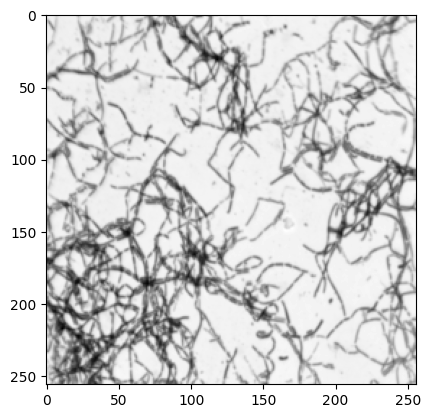

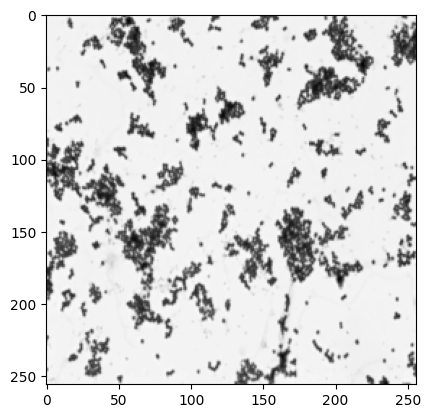

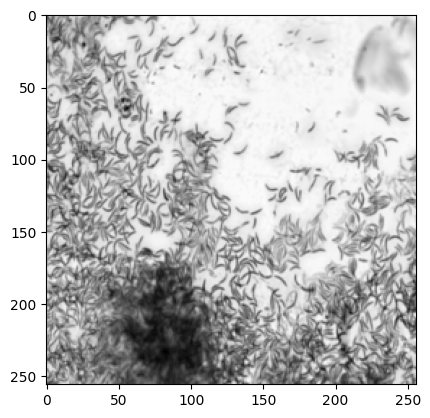

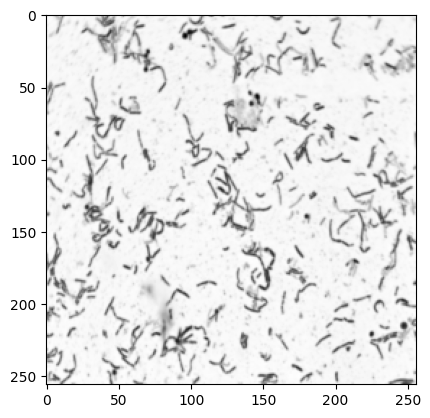

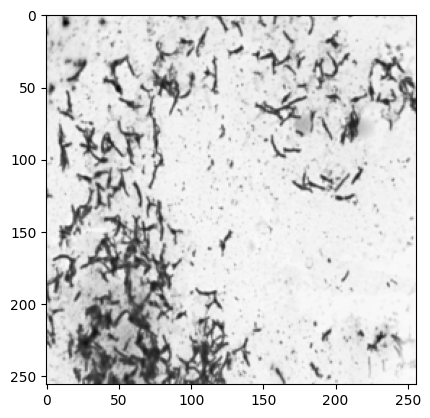

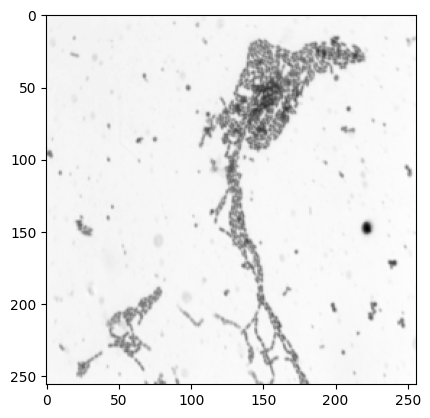

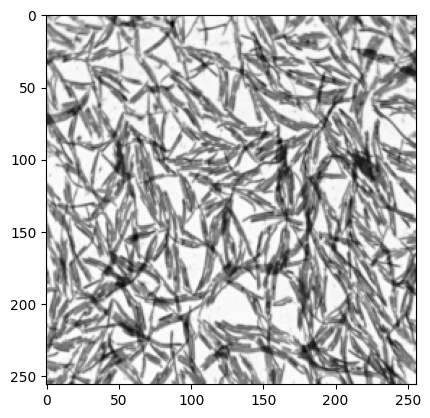

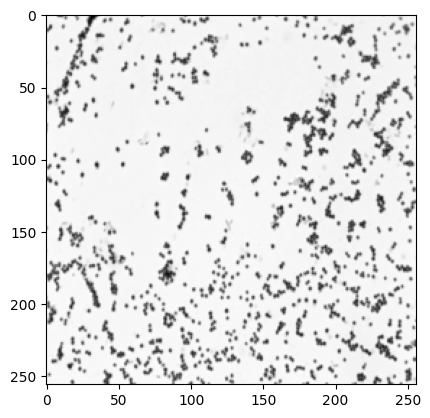

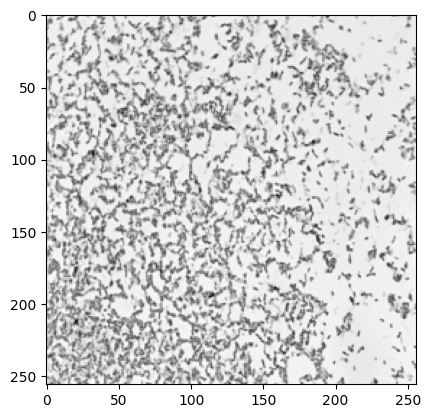

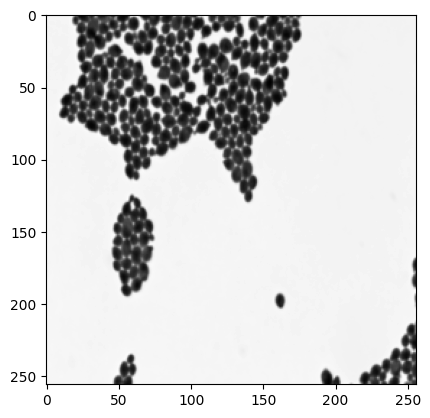

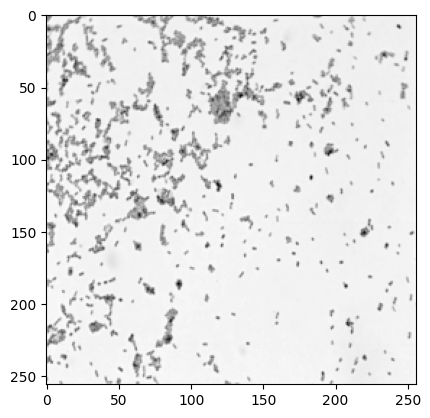

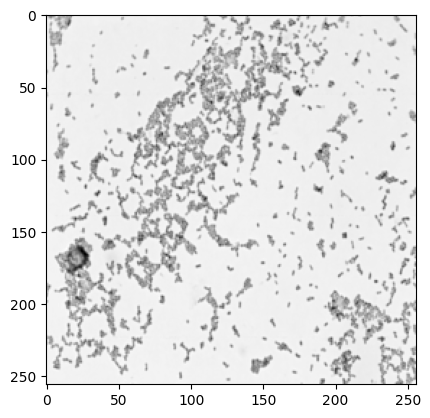

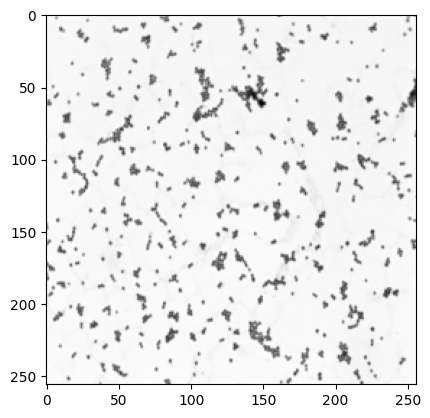

In [ ]:
# display the preprocessed and new images
for image in preprocessed_images:
    plt.imshow(image, cmap='gray')
    plt.show()

In [ ]:
X

array([[[0.94198301, 0.94683107, 0.94588955, ..., 0.96289173,
         0.96140333, 0.96575224],
        [0.92626036, 0.93653324, 0.9437205 , ..., 0.9616272 ,
         0.96258751, 0.96578455],
        [0.90033303, 0.91687356, 0.9342671 , ..., 0.95199313,
         0.94782751, 0.94338529],
        ...,
        [0.93200719, 0.93068101, 0.87275504, ..., 0.81090996,
         0.72164257, 0.61320811],
        [0.92352224, 0.93429921, 0.92650094, ..., 0.65939946,
         0.62712119, 0.59008767],
        [0.90417611, 0.91355186, 0.90488572, ..., 0.68800009,
         0.73472947, 0.70042302]],

       [[0.95103439, 0.95565725, 0.9557815 , ..., 0.94610329,
         0.92979292, 0.9278211 ],
        [0.95296392, 0.95166318, 0.95283596, ..., 0.95008333,
         0.95379575, 0.96436191],
        [0.95057651, 0.9523405 , 0.9501133 , ..., 0.94975287,
         0.95912077, 0.92515593],
        ...,
        [0.95368189, 0.92982449, 0.89546388, ..., 0.96273224,
         0.95801686, 0.96876986],
        [0.9

In [ ]:
y

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
def ClassicalModel(input_shape):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer='adam',
                loss='categorical_crossentropy', metris=['accuracy'])

In [ ]:
from tensorflow import keras

# Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


NameError: ignored

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# train the model on the preprocessed images
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.5007 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 9.6582 - accuracy: 0.1538
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 2.8414 - accuracy: 0.0769
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 2.5500 - accuracy: 0.0769
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 2.3516 - accuracy: 0.0769
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 2.3491 - accuracy: 0.2308
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 2.0561 - accuracy: 0.4615
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 2.0316 - accuracy: 0.2308
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 1.7775 - accuracy: 0.6154
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 1.4694 - accuracy: 0.6923


In [ ]:
def plot_loss_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.2038 - accuracy: 0.6923 - val_loss: 0.9774 - val_accuracy: 0.7692
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.9774 - accuracy: 0.7692 - val_loss: 0.7848 - val_accuracy: 0.7692
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.7848 - accuracy: 0.7692 - val_loss: 0.6400 - val_accuracy: 0.7692
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.6400 - accuracy: 0.7692 - val_loss: 0.4809 - val_accuracy: 0.9231
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.4809 - accuracy: 0.9231 - val_loss: 0.3131 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.3131 - accuracy: 1.0000 - val_loss: 0.2220 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.2220 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========================

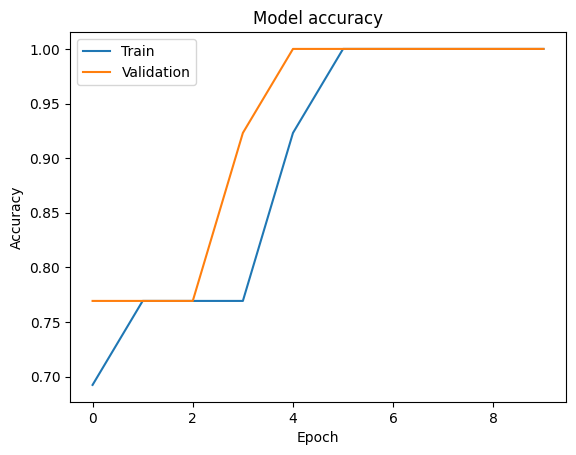

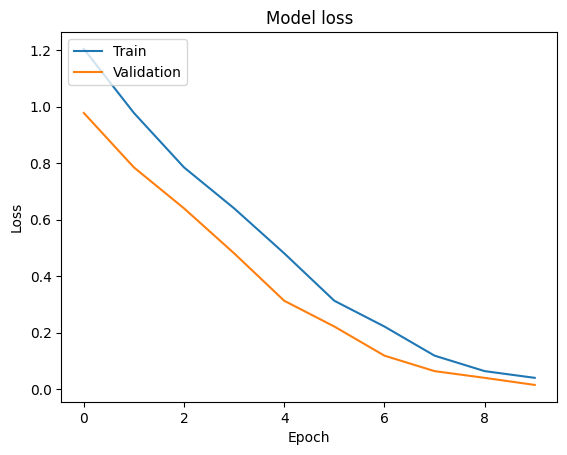

In [ ]:
history = model.fit(X, y, validation_data=(X, y), epochs=10, batch_size=64)
plot_loss_accuracy(history)